In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
import subprocess
import shlex

In [6]:
# Define mean/covariance of a Gaussian
mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]  # covariance (make sure it is symmetric, positive definite)

# generate a mesh-grid for evaluating the pdf
x, y = np.mgrid[-3*np.sqrt(cov[0][0])+mean[0]:3*np.sqrt(cov[0][0])+mean[0]:.1, -3*np.sqrt(cov[1][1])+mean[1]:3*np.sqrt(cov[1][1])+mean[1]:.1]
# stack x-y coordinates
pos = np.dstack((x, y))

# generate Gaussian object
gaussian = multivariate_normal(mean, cov)

# evaluate the Gaussian pdf at the x-y coordinates
z = gaussian.pdf(pos)

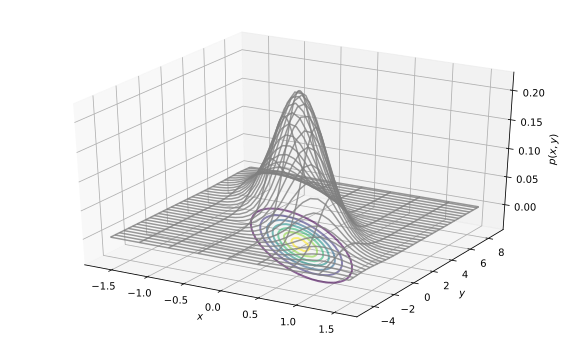

In [7]:
# plotting: 3D and 2D contour projection
f = plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
ax = f.add_subplot(1,1,1, projection='3d')
ax.plot_wireframe(x,y,z, color="grey", rstride=4, cstride=4, alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=-0.04,  alpha=0.6, linewidths=2)
ax.set_zlim3d(-0.04, gaussian.pdf(mean));
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$p(x,y)$')
# print to pdf
fname ='gaussian3d.pdf'
plt.savefig(fname, bbox_inches='tight')
proc=subprocess.Popen(shlex.split('lpr {f}'.format(f=fname)))


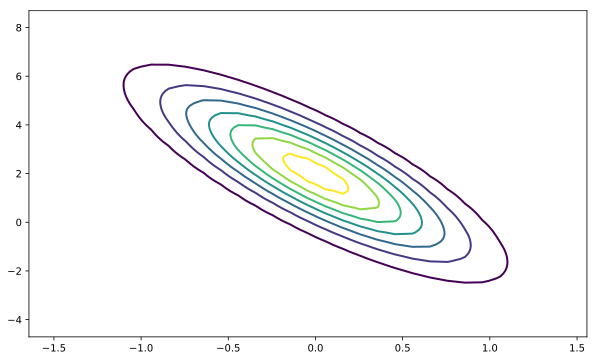

In [8]:
# contour plot 
plt.figure(figsize=(10,6))
plt.contour(x, y, z, linewidths=2)
plt.show()

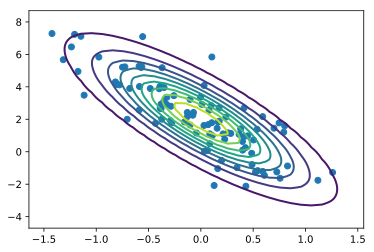

In [9]:
# N samples from the Gaussian
N = 100
x1, x2 = np.random.multivariate_normal(mean, cov, N).T

# plot the the contour on top of the samples
xx = [mean[0]+2*np.sqrt(cov[0][0]), 0]

levels = np.append(0, np.linspace(gaussian.pdf(xx), gaussian.pdf(mean), 10))

plt.scatter(x1,x2)
plt.contour(x, y, z, levels, linewidths=2)
plt.show()